In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
# load dataset
data = pd.read_csv('train.csv')
data.head()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(76020, 371)

In [2]:
data_train, data_test =  train_test_split(
    data,
    test_size=0.3,
    stratify = data['TARGET'],
    random_state = 888)

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    stratify = data['TARGET'],
    random_state = 888)
X_train.shape, y_train.shape

((53214, 370), (53214,))

In [3]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [4]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

203

In [5]:
corr_features
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)
X_train


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,var38
58120,115987,2,42,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,120588.810000
59782,119351,2,22,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,58960.380000
29564,59134,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,342427.740000
70088,139986,2,36,0.0,908.79,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,83625.810000
41081,82245,2,26,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,196147.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67404,134591,2,43,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,117310.979016
3731,7493,2,69,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,54095.610000
12426,24929,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,117310.979016
24771,49603,2,55,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,150453.900000


In [6]:

Y_corr_features = corr_features
Y_corr_features.add('TARGET')
data_train = data_train.drop(corr_features, axis=1)
data_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,var38
58120,115987,2,42,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,120588.810000
59782,119351,2,22,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,58960.380000
29564,59134,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,342427.740000
70088,139986,2,36,0.0,908.79,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,83625.810000
41081,82245,2,26,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,196147.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67404,134591,2,43,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,117310.979016
3731,7493,2,69,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,54095.610000
12426,24929,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,117310.979016
24771,49603,2,55,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,150453.900000


<ipython-input-52-bfd8b874ace7>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


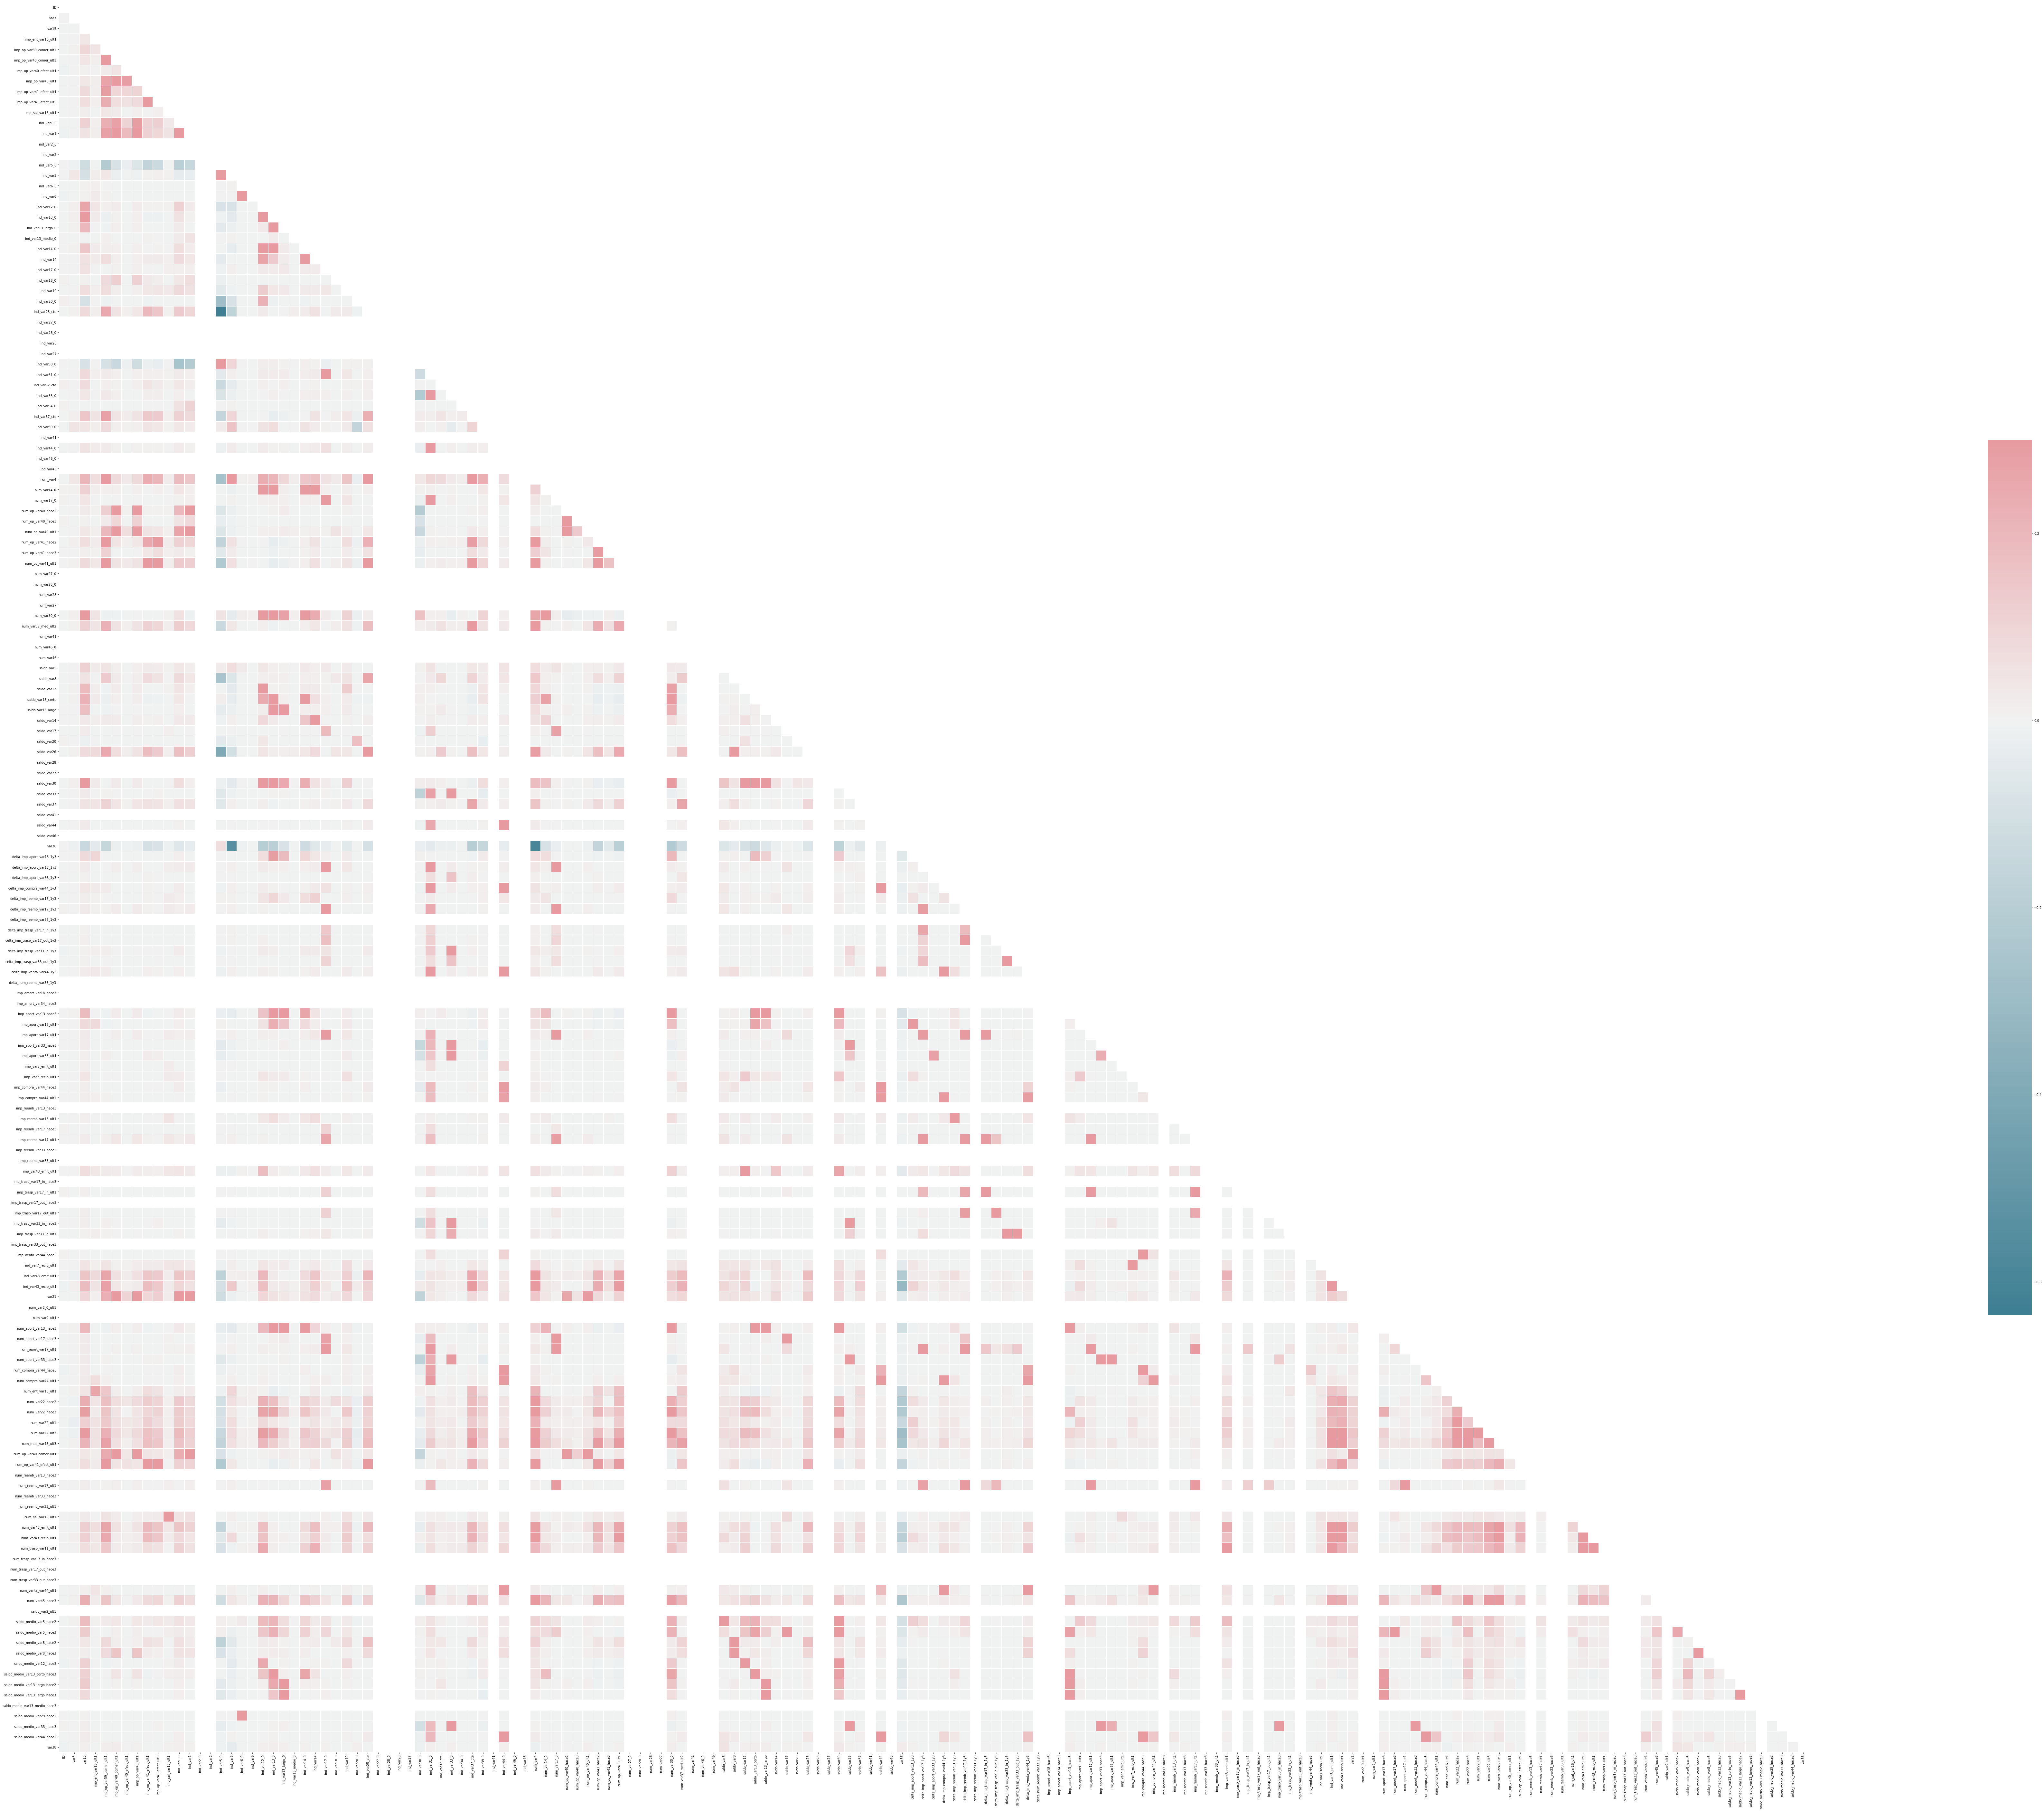

In [52]:
import seaborn as sns
# Compute the correlation matrix
corr = data_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #True values in upper triangle

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(200, 100))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
c_grid = np.linspace(0.2,3,5)
grid_lr = GridSearchCV(estimator=LogisticRegression(), cv=5, param_grid={'C': c_grid}, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print(f"Optimal C value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")
print(f"C: {grid_lr.cv_results_['param_C']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")

Optimal C value: {'C': 0.8999999999999999}
Best Score: 0.5734930052996268
C: [0.2 0.8999999999999999 1.5999999999999999 2.3 3.0]
Score: [0.57349004 0.57349301 0.57349129 0.57349018 0.57340425]


D:\Program2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(f"C: {grid_lr.cv_results_['params']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
print(grid_lr.cv_results_)
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

C: [{'C': 0.2}, {'C': 0.8999999999999999}, {'C': 1.5999999999999999}, {'C': 2.3}, {'C': 3.0}]
Score: [0.57349004 0.57349301 0.57349129 0.57349018 0.57340425]
{'mean_fit_time': array([1.37556858, 1.20935087, 1.32717624, 1.38744507, 1.46448069]), 'std_fit_time': array([0.26770817, 0.22995105, 0.33207161, 0.30571063, 0.31580222]), 'mean_score_time': array([0.01057076, 0.0099678 , 0.01177206, 0.01057053, 0.0109705 ]), 'std_score_time': array([0.00119742, 0.0006138 , 0.00116764, 0.00079799, 0.00141114]), 'param_C': masked_array(data=[0.2, 0.8999999999999999, 1.5999999999999999, 2.3, 3.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.2}, {'C': 0.8999999999999999}, {'C': 1.5999999999999999}, {'C': 2.3}, {'C': 3.0}], 'split0_test_score': array([0.57341752, 0.57343189, 0.57341682, 0.57341613, 0.57299139]), 'split1_test_score': array([0.56318518, 0.56318425, 0.56318541, 0.56318634, 0.56318471]), 'split2_test_score': a

# DecisionTreeClassifier 1 - 15

In [79]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
c_grid = range(1,15,1)
grid_lr = GridSearchCV(estimator=tree.DecisionTreeClassifier(), cv=5, param_grid={'max_depth': c_grid}, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print(f"Optimal Tree value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Tree value: {'max_depth': 7}
Best Score: 0.8106758371001552


In [80]:
print(f"C: {grid_lr.cv_results_['params']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
print(grid_lr.cv_results_)
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

C: [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}]
Score: [0.68173997 0.76996221 0.7945698  0.79999546 0.80558302 0.80702092
 0.81067584 0.80861094 0.80086353 0.79248342 0.77982916 0.77165115
 0.76143348 0.74645809]
{'mean_fit_time': array([0.08959579, 0.12408714, 0.16737604, 0.19210553, 0.22282686,
       0.26350965, 0.30439329, 0.33531685, 0.37043757, 0.37642698,
       0.40235233, 0.43505902, 0.50446124, 0.51024904]), 'std_fit_time': array([0.00263327, 0.00223886, 0.0156599 , 0.00341849, 0.00223734,
       0.00873585, 0.01758548, 0.00837857, 0.04080073, 0.00048783,
       0.00162635, 0.01115159, 0.03469214, 0.0102358 ]), 'mean_score_time': array([0.01077123, 0.01137209, 0.01215839, 0.01137018, 0.01097178,
       0.0119689 , 0.01196876, 0.011762  , 0.01156788, 0.01156535,
     

# DecisionTreeClassifier 10 - 50

In [77]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
c_grid = np.linspace(10,50,10)
grid_lr = GridSearchCV(estimator=tree.DecisionTreeClassifier(), cv=5, param_grid={'max_depth': c_grid}, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print(f"Optimal Tree value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Tree value: {'max_depth': 10.0}
Best Score: 0.7934941856014898


In [78]:
print(f"C: {grid_lr.cv_results_['params']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
print(grid_lr.cv_results_)
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

C: [{'max_depth': 10.0}, {'max_depth': 14.444444444444445}, {'max_depth': 18.88888888888889}, {'max_depth': 23.333333333333336}, {'max_depth': 27.77777777777778}, {'max_depth': 32.22222222222222}, {'max_depth': 36.66666666666667}, {'max_depth': 41.111111111111114}, {'max_depth': 45.55555555555556}, {'max_depth': 50.0}]
Score: [0.79349419 0.74258997 0.69295388 0.64219972 0.60376099 0.57235505
 0.56533264 0.55608266 0.55450172 0.55233404]
{'mean_fit_time': array([0.40417037, 0.52458944, 0.58173347, 0.63003201, 0.64604692,
       0.66182122, 0.66943164, 0.72008696, 0.86031437, 0.83429818]), 'std_fit_time': array([0.00690211, 0.0255985 , 0.01183559, 0.01533882, 0.01696192,
       0.02999556, 0.01679397, 0.03937503, 0.08955224, 0.10585587]), 'mean_score_time': array([0.01278868, 0.01235938, 0.01277442, 0.01215253, 0.01217327,
       0.01276884, 0.01195874, 0.01436143, 0.01594958, 0.01436334]), 'std_score_time': array([1.15127341e-03, 4.95185000e-04, 1.71594588e-03, 4.37408825e-04,
       3.

# naive_bayes

In [82]:
from sklearn import naive_bayes
param_grid = {}
grid_lr = GridSearchCV(estimator=naive_bayes.GaussianNB(),param_grid={}, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print(f"Optimal Naive Bayes value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Naive Bayes value: {}
Best Score: 0.5188062201846513


In [83]:
print(f"C: {grid_lr.cv_results_['params']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
print(grid_lr.cv_results_)


C: [{}]
Score: [0.51880622]
{'mean_fit_time': array([0.1484067]), 'std_fit_time': array([0.01038854]), 'mean_score_time': array([0.03451138]), 'std_score_time': array([0.00256606]), 'params': [{}], 'split0_test_score': array([0.51670372]), 'split1_test_score': array([0.52188169]), 'split2_test_score': array([0.51696297]), 'split3_test_score': array([0.51599805]), 'split4_test_score': array([0.52248468]), 'mean_test_score': array([0.51880622]), 'std_test_score': array([0.00278185]), 'rank_test_score': array([1])}


# RandomForestClassifier n_estimators

In [71]:
from sklearn.ensemble import RandomForestClassifier
# to find the best max_depth
c_grid = {'n_estimators': range(40,100,10)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print(f"Optimal Random Forest value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Random Forest value: {'n_estimators': 80}
Best Score: 0.7811964068034216


In [72]:
print(f"C: {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
print(grid_lr.cv_results_)
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

C: {'mean_fit_time': array([2.30485597, 2.77401795, 3.48065062, 4.27404265, 4.89224215,
       5.01279521]), 'std_fit_time': array([0.16029456, 0.05202934, 0.29084462, 0.09509524, 0.08687611,
       0.098238  ]), 'mean_score_time': array([0.07930551, 0.09514828, 0.13786631, 0.14481258, 0.16645775,
       0.17174163]), 'std_score_time': array([0.00527871, 0.00363629, 0.04244654, 0.01471934, 0.01979427,
       0.00903622]), 'param_n_estimators': masked_array(data=[40, 50, 60, 70, 80, 90],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 40}, {'n_estimators': 50}, {'n_estimators': 60}, {'n_estimators': 70}, {'n_estimators': 80}, {'n_estimators': 90}], 'split0_test_score': array([0.79252211, 0.78838904, 0.79642113, 0.79934687, 0.80157941,
       0.80788739]), 'split1_test_score': array([0.74926001, 0.75292346, 0.75837953, 0.76075832, 0.76400628,
       0.76702734]), 'split2_test_score': array([0.7563

# RandomForestClassifier n_estimators 40 - 160

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# to find the best max_depth
c_grid = {'n_estimators': range(40,160,10)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print(f"Optimal Random Forest value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Random Forest value: {'n_estimators': 150}
Best Score: 0.7896134201292084


In [76]:
print(f": {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

C: {'mean_fit_time': array([2.1995575 , 2.75344558, 3.34122543, 3.91124821, 4.72978892,
       5.13436947, 5.37364931, 6.42126594, 6.80463834, 7.17329898,
       7.56177502, 8.07636471]), 'std_fit_time': array([0.03969584, 0.07664766, 0.18205397, 0.1218002 , 0.19167112,
       0.04960826, 0.15785566, 0.46533774, 0.52668894, 0.17588963,
       0.17722095, 0.18205839]), 'mean_score_time': array([0.07785711, 0.09295754, 0.10981693, 0.12562189, 0.14891558,
       0.16458011, 0.17461629, 0.21028881, 0.21412101, 0.22719517,
       0.24595094, 0.25252728]), 'std_score_time': array([0.00264653, 0.00296624, 0.00468278, 0.00117449, 0.00581392,
       0.0048919 , 0.00533372, 0.0164854 , 0.01053413, 0.00644639,
       0.01295417, 0.00409682]), 'param_n_estimators': masked_array(data=[40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtyp

# RandomForestClassifier max_depth

In [86]:
from sklearn.ensemble import RandomForestClassifier
# to find the best max_depth
c_grid = {'max_depth': range(1,20)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print(f"Optimal Random Forest value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Random Forest value: {'max_depth': 17}
Best Score: 0.8268740400106719


In [87]:
print(f": {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

: {'mean_fit_time': array([0.52971964, 0.770684  , 1.01220345, 1.1595664 , 1.36916823,
       1.61876388, 1.90245275, 1.99239531, 2.40608902, 2.49434419,
       2.86840167, 2.97851062, 3.13669639, 3.39526505, 3.56222005,
       3.56814351, 3.918361  , 3.94954844, 4.35616822]), 'std_fit_time': array([0.01354316, 0.05060729, 0.01762799, 0.0313293 , 0.04188615,
       0.10541954, 0.06415737, 0.07553701, 0.07844101, 0.14124726,
       0.11028837, 0.08927518, 0.13285007, 0.1247016 , 0.16301246,
       0.14126123, 0.11569721, 0.09109229, 0.11331924]), 'mean_score_time': array([0.04439158, 0.05050745, 0.05463877, 0.05620446, 0.05991988,
       0.06208239, 0.06651573, 0.0696569 , 0.08473721, 0.08040385,
       0.08534632, 0.09168382, 0.09652481, 0.11273561, 0.11057897,
       0.11127954, 0.12049441, 0.11838212, 0.12724457]), 'std_score_time': array([0.00278913, 0.00296809, 0.00171709, 0.00285085, 0.00408955,
       0.00117804, 0.00374821, 0.00199995, 0.01707073, 0.00459144,
       0.00265776, 

# RandomForestClassifier max_depth 20 - 30

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# to find the best max_depth
c_grid = {'max_depth': range(20,30)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print(f"Optimal Random Forest value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Random Forest value: {'max_depth': 22}
Best Score: 0.8268304154039875


In [89]:
print(f": {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

: {'mean_fit_time': array([4.16187634, 4.28156409, 4.40828695, 4.53905487, 4.68071203,
       4.64878511, 4.67692294, 4.74038033, 4.79179931, 4.93395991]), 'std_fit_time': array([0.09344003, 0.07585397, 0.05729176, 0.18730785, 0.14499506,
       0.0751258 , 0.06183925, 0.04618299, 0.05874154, 0.05331235]), 'mean_score_time': array([0.12666988, 0.13344574, 0.14121485, 0.13843594, 0.14162836,
       0.14380608, 0.14580989, 0.15001001, 0.15219355, 0.16216102]), 'std_score_time': array([0.00454779, 0.00490778, 0.01433507, 0.00336704, 0.0021008 ,
       0.00131602, 0.00170928, 0.00136002, 0.00214813, 0.00600147]), 'param_max_depth': masked_array(data=[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 20}, {'max_depth': 21}, {'max_depth': 22}, {'max_depth': 23}, {'max_depth': 24}, {'max_depth': 25}, {'max_depth': 26}, {

# RandomForestClassifier min_samples_split  2-20

In [90]:
from sklearn.ensemble import RandomForestClassifier
# to find the best max_depth
c_grid = {'min_samples_split': range(2,20)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print(f"Optimal Random Forest value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Random Forest value: {'min_samples_split': 19}
Best Score: 0.8177885595101632


In [91]:
print(f"Optimal Random Forest value: {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

Optimal Random Forest value: {'mean_fit_time': array([5.5626699 , 5.56971264, 5.31637363, 5.28278799, 5.4959074 ,
       5.24897447, 5.47837734, 5.41852632, 5.37363725, 5.2986464 ,
       5.11508384, 5.05788083, 5.08740859, 5.10301633, 5.19549613,
       5.25321603, 5.05129719, 4.97588086]), 'std_fit_time': array([0.14810358, 0.11324031, 0.15063841, 0.10981474, 0.26016436,
       0.28713158, 0.20524517, 0.1070946 , 0.0505637 , 0.20565081,
       0.09512656, 0.04115683, 0.09239488, 0.08168738, 0.13064793,
       0.25699399, 0.0484719 , 0.02997414]), 'mean_score_time': array([0.17633023, 0.17314081, 0.16993847, 0.17752991, 0.20406537,
       0.16874628, 0.17392478, 0.17911572, 0.17514706, 0.17453761,
       0.16875024, 0.16735611, 0.18350792, 0.1663609 , 0.1717411 ,
       0.16814981, 0.16655087, 0.16517048]), 'std_score_time': array([0.00948785, 0.00311217, 0.00215379, 0.00975034, 0.06130814,
       0.00355009, 0.00461317, 0.01729489, 0.00371844, 0.00886713,
       0.00311136, 0.0035407

# RandomForestClassifier min_samples_split 50 -200

In [92]:
from sklearn.ensemble import RandomForestClassifier
# to find the best max_depth
c_grid = {'min_samples_split': range(50,200,10)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print(f"Optimal Random Forest value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Random Forest value: {'min_samples_split': 180}
Best Score: 0.8315945644934473


In [93]:
print(f"Optimal Random Forest value: {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

Optimal Random Forest value: {'mean_fit_time': array([5.13264971, 4.91628327, 4.86098857, 4.79376831, 4.83926873,
       4.70800681, 4.68412809, 4.66960316, 4.6458148 , 4.72256594,
       4.69704103, 4.74852147, 4.54327326, 4.70486746, 4.70742583]), 'std_fit_time': array([0.13930723, 0.06236612, 0.12061543, 0.10136424, 0.17144655,
       0.16049764, 0.16228817, 0.1140217 , 0.0675067 , 0.10196564,
       0.11238442, 0.10852079, 0.06220122, 0.08679114, 0.20131122]), 'mean_score_time': array([0.16754856, 0.1591713 , 0.15499587, 0.15279231, 0.15338526,
       0.14861007, 0.14940748, 0.14920182, 0.14939785, 0.14741631,
       0.14901309, 0.14779944, 0.14740734, 0.1515892 , 0.14559402]), 'std_score_time': array([0.00848147, 0.00293298, 0.0032597 , 0.00238439, 0.00298179,
       0.0010768 , 0.00270195, 0.00205774, 0.00394416, 0.00236605,
       0.00393086, 0.0026345 , 0.00370964, 0.01125472, 0.00268259]), 'param_min_samples_split': masked_array(data=[50, 60, 70, 80, 90, 100, 110, 120, 130, 14

# RandomForestClassifier combination

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# to find the best max_depth
c_grid = {'min_samples_split': [180,150,190,170,130], 'max_depth': range(20,25), 'n_estimators': range(145,156)}
grid_lr = GridSearchCV(RandomForestClassifier(), param_grid = c_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

In [ ]:
print(f"Optimal Random Forest value: {grid_lr.cv_results_}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

In [11]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
c_grid =range(1,15)
grid_lr = GridSearchCV(estimator=tree.DecisionTreeClassifier(), cv=5, param_grid={'max_depth': c_grid}, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print(f"Optimal Tree value: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

Optimal Tree value: {'max_depth': 10}
Best Score: 0.7165631441828977


In [13]:
print(f"C: {grid_lr.cv_results_['params']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")
np.savetxt("new.csv", grid_lr.cv_results_['mean_test_score'], delimiter=',', fmt='%f')

C: [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}]
Score: [0.67162339 0.6832795  0.68530909 0.69503156 0.69818094 0.70428477
 0.71174429 0.70722705 0.71043516 0.71656314 0.71100005 0.70964077
 0.71272788 0.70545666]


In [ ]:
print(f"C: {grid_lr.cv_results_['param_C']}")
print(f"Score: {grid_lr.cv_results_['mean_test_score']}")

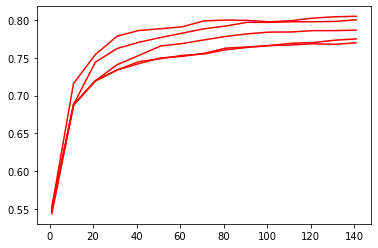

In [118]:
x = np.arange(1,151,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()